# Armijo Rule Implementation

Armijo's Rule for Gradient Descent is used to determine the optimal value of the learning rate $\alpha$ in that particular descent step. The check condition used is as follows:

# $f(x,y) - f\left(x - \alpha \frac{\partial f}{\partial x} , y - \alpha \frac{\partial f}{\partial y}\right) \geq \alpha*\sigma*\|\nabla f(x,y) \|^{2}$

# if $d_{k} = - \nabla f(x,y)$

The stopping criteria used in the following implementation is (Option 1): 

# $\|\nabla f(x)\| \leq \varepsilon$  

where $\varepsilon \in ( 10^{-10} , 10^{-6})$. As an user please try to give the input in the form 1e-6 or 1e-7. I have tried for the values of 1e-5, 1e-6 and 1e-7 and have got convincing results for all of them

Analysis with another stopping criteria (Option 2):

# $\frac{\|\nabla f(x)\|}{\|\nabla f(x_0)\|} \leq \varepsilon$   

What if the function provided does not have a minima. Then the algorithm runs for 3000 algorithms and whichever point it reaches is declared as the minima.

The Armijo's rule on the Gradient Descent algorithm has been used with differing values of $\beta$ and $\sigma$. I have used 4 different values for $\beta = [0.01 , 0.33 , 0.67 , 0.99]$ and 4 different values for $\sigma = [0.01 , 0.33 , 0.67 , 0.99]$. Thus there are 16 pairs of beta and sigma and I have tabulated the minimas reached, no. of iterations required and contour plots for each of the pairs.

In [120]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

In [141]:
def calculate_derivative(x,y):
    derivative_wrt_x = 2*a*x + c*y + d
    derivative_wrt_y = 2*b*y + c*x + e
    return derivative_wrt_x , derivative_wrt_y

def f(x,y):
    f = a*x**2 + b*y**2 + c*x*y + d*x + e*y + g
    return f

def decide_to_exit(epsilon, norm_of_grad , stop_crit_deno , stop_crit_choice , k):
        #Check for stopping criteria and if not satisfied for first 1000 iterations then exit
        if stop_crit_choice == 1:
            if norm_of_grad <= epsilon or k >= 3000: 
                return True
        
        elif stop_crit_choice == 2:
            if norm_of_grad / stop_crit_deno <= epsilon or k >= 3000: 
                return True
            
        return False

def gradient_descent_using_armijo_rule(epsilon , beta , sigma , stop_crit_choice):
    x = 0  #####Init point
    y = 0   #####Init point
    
    ###Following is for the calculation of the second stopping criteria
    der_at_x0 , der_at_y0 = calculate_derivative(x,y)
    stop_crit_deno = np.sqrt(der_at_x0**2 + der_at_y0**2)
    k = 0
    store_x = [x]    ###Stores values of the points at each iteration
    store_y = [y]    ###Stores values of the points at each iteration
    
    while True:
        k = k + 1    ###Counts Interations
        x_der , y_der = calculate_derivative(x,y)
        alpha = 1      ###Initial value for alpha (also Armijo parameter)
        while True:
            
            #Main condition to check for the choice of learning rate for the current iteration of GD
            if ((f(x,y) - f(x - alpha * x_der , y - alpha * y_der)) >=  alpha * sigma * (x_der**2 + y_der**2)):
                break   
            else:
                #Update for current  value of learning rate
                alpha *= beta
                
        #Gradient Update Step
        x = x - alpha * x_der
        y = y - alpha * y_der
        
        #Store current point to be used for later while plotting
        store_x.append(x)
        store_y.append(y)
        
        #Stopping Criteria
        norm_of_grad = np.sqrt(x_der**2 + y_der**2)
        if decide_to_exit(epsilon, norm_of_grad , stop_crit_deno , stop_crit_choice , k):
            break
            
    return x , y , k , store_x , store_y

print("Give input for the coefficients of x^2, y^2, xy, x, y and constant term for a function from R^2 to R: ")
a = float(input("Coefficient for x^2: "))
b = float(input("Coefficient for y^2: "))
c = float(input("Coefficient for xy: "))
d = float(input("Coefficient for x: "))
e = float(input("Coefficient for y: "))
g = float(input("Constant term: "))
print("Your equation is: {}x^2 + {}y^2 + {}xy + {}x + {}y + {}".format(a,b,c,d,e,g))
stop_crit_choice = 1     #### If you want the second stopping criteria then "2"
epsilon = float(input("Give the epsilon value for the stopping criteria: "))
beta = [0.01 , 0.33 , 0.67 , 0.99]
sigma = [0.01 , 0.33 , 0.67 , 0.99]
results = []

for i in range(4):
    for j in range(4):
        x_minima, y_minima, iterations, x_values, y_values = gradient_descent_using_armijo_rule(epsilon, beta[i], sigma[j], stop_crit_choice)
        results.append((beta[i], sigma[j], x_minima, y_minima, iterations, x_values, y_values))
        
print("Computations Done!!")

Give input for the coefficients of x^2, y^2, xy, x, y and constant term for a function from R^2 to R: 
Coefficient for x^2: 1
Coefficient for y^2: 1
Coefficient for xy: 1
Coefficient for x: 1
Coefficient for y: 2
Constant term: 0
Your equation is: 1.0x^2 + 1.0y^2 + 1.0xy + 1.0x + 2.0y + 0.0
Give the epsilon value for the stopping criteria: 1e-6
Computations Done!!


# Number of iterations taken by each pair to converge to minima 

In [142]:
row_names = ['beta = 0.01', 'beta = 0.33', 'beta = 0.67', 'beta = 0.99']
col_names = ['sigma = 0.01', 'sigma = 0.33', 'sigma = 0.67', 'sigma = 0.99']
data = [
    [results[0][4], results[1][4], results[2][4], results[3][4]],
    [results[4][4], results[5][4], results[6][4], results[7][4]],
    [results[10][4], results[9][4], results[10][4], results[11][4]],
    [results[12][4], results[13][4], results[14][4], results[15][4]]
]
df = pd.DataFrame(data, index=row_names, columns=col_names)
print(df)

             sigma = 0.01  sigma = 0.33  sigma = 0.67  sigma = 0.99
beta = 0.01           504           504          1342          3000
beta = 0.33             6             6            38          3000
beta = 0.67            26            21            26          3000
beta = 0.99           440            22            22           735


# Minima points each pair converged to

In [143]:
xs = [0 for _ in range(16)]
ys = [0 for _ in range(16)]

#Round of the values of the minima (for each pair) for efficient display :)
for i in range(16):
    xs[i] = round(results[i][2] , 4)
    ys[i] = round(results[i][3] , 4)
    
data = [
    [(xs[0] , ys[0]) , (xs[1] , ys[1]) , (xs[2] , ys[2]) , (xs[3] , ys[3])],
    [(xs[4] , ys[4]) , (xs[5] , ys[5]) , (xs[6] , ys[6]) , (xs[7] , ys[7])],
    [(xs[8] , ys[8]) , (xs[9] , ys[9]) , (xs[10] , ys[10]) , (xs[11] , ys[11])],
    [(xs[12] , ys[12]) , (xs[13] , ys[13]) , (xs[14] , ys[14]) , (xs[15] , ys[15])]
]
df = pd.DataFrame(data, index=row_names, columns=col_names)
print(df)

             sigma = 0.01  sigma = 0.33  sigma = 0.67        sigma = 0.99
beta = 0.01  (-0.0, -1.0)  (-0.0, -1.0)  (-0.0, -1.0)  (-0.1671, -0.4263)
beta = 0.33  (-0.0, -1.0)  (-0.0, -1.0)  (-0.0, -1.0)        (-0.0, -1.0)
beta = 0.67   (0.0, -1.0)  (-0.0, -1.0)  (-0.0, -1.0)        (-0.0, -1.0)
beta = 0.99   (0.0, -1.0)  (-0.0, -1.0)  (-0.0, -1.0)        (-0.0, -1.0)


# Plots for all the 16 pairs of $\beta$ and $\sigma$

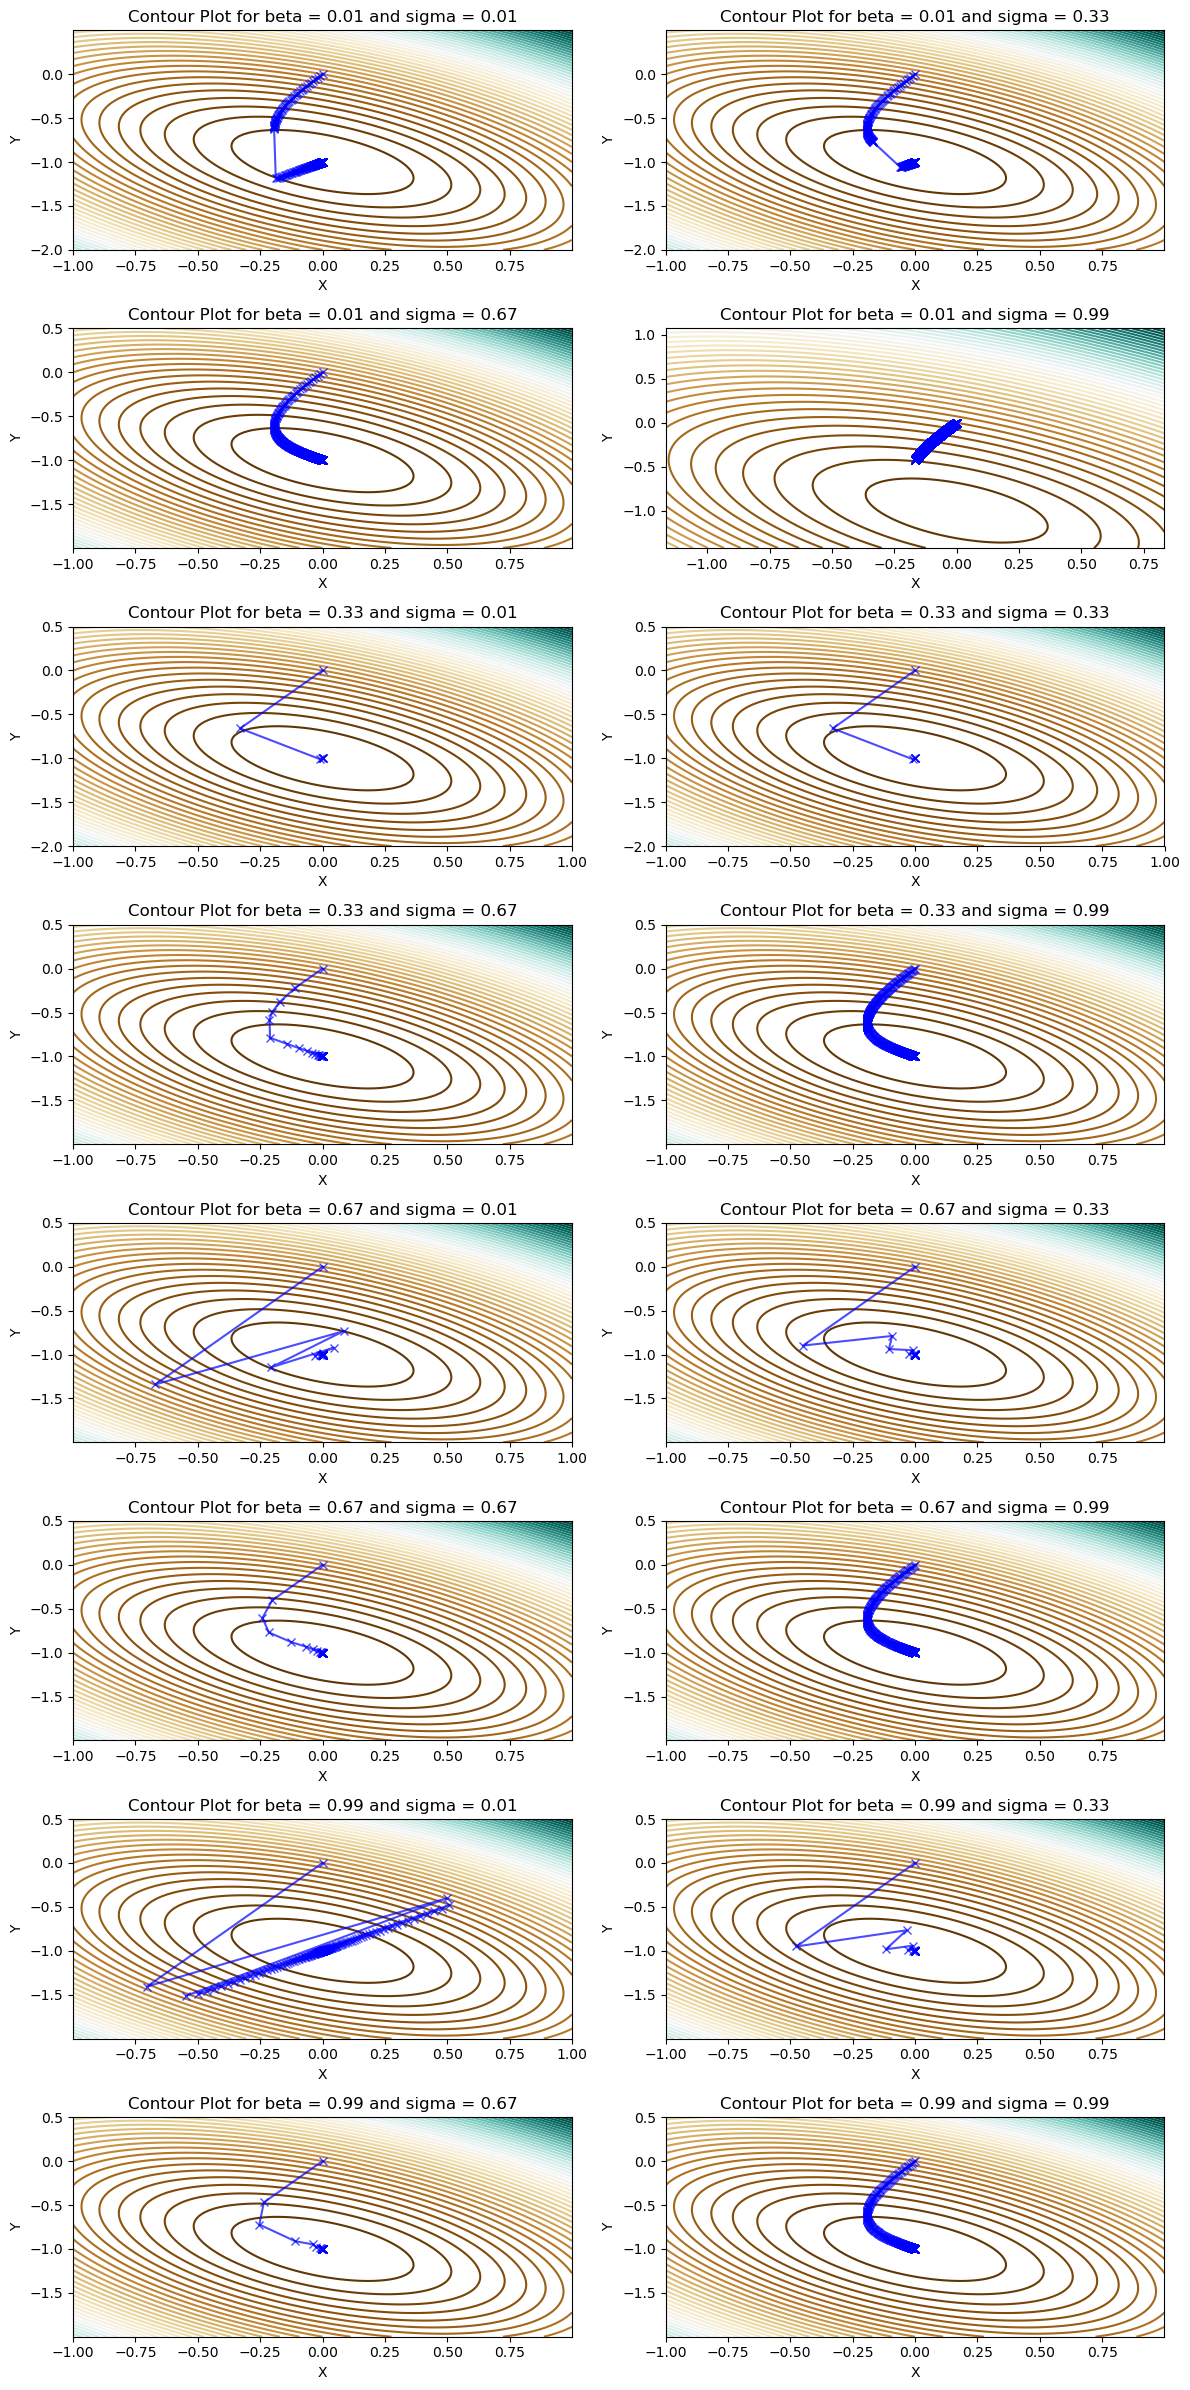

In [144]:
fig, axs = plt.subplots(8, 2, figsize=(12, 24))

# Loop through each result and create a subplot
for i, result in enumerate(results):
    row_index = i // 2
    col_index = i % 2
    
    #Create the meshgrid
    x_min, x_max = result[2] - 1, result[2] + 1
    y_min, y_max = result[3] - 1, result[3] + 1.5
    X, Y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
    Z = f(X, Y)
    
    # Plot the contour and data points
    axs[row_index, col_index].contour(X, Y, Z, levels=50, cmap='BrBG')
    axs[row_index, col_index].plot(result[5], result[6], marker='x', color='blue', alpha=0.7)
    axs[row_index, col_index].set_xlabel("X")
    axs[row_index, col_index].set_ylabel("Y")
    axs[row_index, col_index].set_title("Contour Plot for beta = {} and sigma = {}".format(result[0] , result[1]))

plt.tight_layout()
plt.show()